# 판매 데이터 분석


In [1]:
import pandas as pd
df = pd.read_excel('orderdata.xlsx')
desired_cols = ['Customer Shipment Date', 'Quantity','Product Amount','Shipment To State']
df = df[desired_cols]

In [2]:
df.dtypes

Customer Shipment Date    datetime64[ns]
Quantity                           int64
Product Amount                   float64
Shipment To State                 object
dtype: object

In [3]:
df['month'] = pd.DatetimeIndex(df['Customer Shipment Date']).month

In [4]:
df.head()

,Customer Shipment Date,Quantity,Product Amount,Shipment To State,month
0,2021-06-28,1,31.99,CA,6
1,2021-06-28,1,31.99,CT,6
2,2021-06-28,1,23.03,TX,6
3,2021-06-28,1,23.03,CA,6
4,2021-06-28,1,28.79,TX,6


# 월 별 판매량 추이

총 판매량 377


* 총 매출의 40 퍼센트 이상이 5~7월 (여름) 에 집중되어 있음


In [16]:
df.groupby(['month']).sum()['Quantity']

month
1     22
2     28
3     60
4     40
5     83
6     70
7     10
8      5
9      9
10    19
11    16
12    15
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='month'>

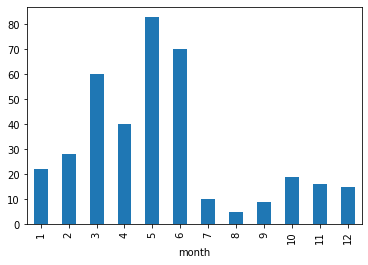

In [17]:
df.groupby(['month']).sum()['Quantity'].plot(kind='bar')

# 월 별 매출 추이

총 매출액
12676.519999999993

* 총 매출의 55퍼센트 이상이 5~7월(여름)에 집중되어 있음

In [19]:
# 월 별 매출액 (달러)
df.groupby(['month']).sum()['Product Amount']

month
1      569.40
2      815.72
3     2161.00
4     1572.40
5     3231.17
6     2141.06
7      319.90
8      159.95
9      287.91
10     611.81
11     191.94
12     364.74
Name: Product Amount, dtype: float64

<AxesSubplot:xlabel='month'>

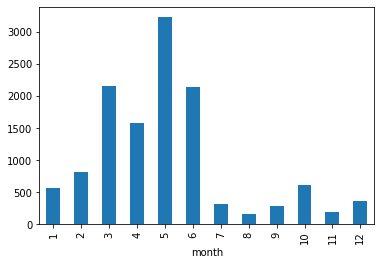

In [8]:
df.groupby(['month']).sum()['Product Amount'].plot(kind='bar')

# 주 별 매출 분석
## 미국 주 아니거나 CONFIDENTIAL (기밀) 데이터 제거하고 분석 진행
## 매출 발생 주(State) 수 : 44
## 총 판매량: 378
## 판매량 상위 4개 주(CA, FL, NY, TX)가 매출의 55퍼센트 이상 차지.

In [9]:
df.groupby(['Shipment To State'])['Quantity'].sum().head()

Shipment To State
AE    1
AK    3
AL    3
AR    1
AZ    9
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Shipment To State'>

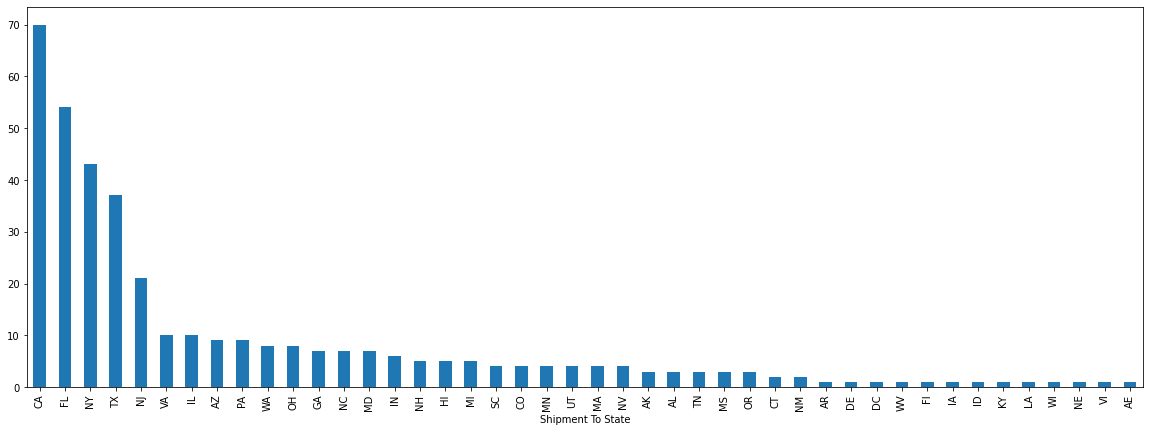

In [10]:
df.groupby(['Shipment To State'])['Quantity'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,7))

<AxesSubplot:xlabel='Shipment To State'>

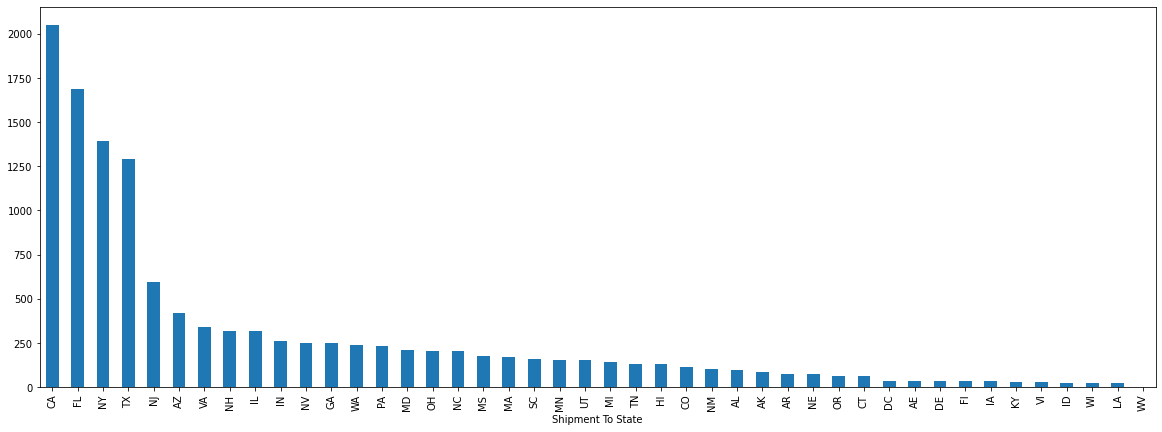

In [11]:
df.groupby(['Shipment To State'])['Product Amount'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,7))

# DATA INSIGHT

## 매출의 55퍼센트 이상이 여름(5월~7월)에 몰려있음
## 매출의 55퍼센트 이상이 상위 4개 주(CA, FL, NY, TX)에 몰려있음


# 